
#### Data Mining 


####  Predicting Fuel Efficency 

Load the data

In [64]:
import pandas as pd

In [111]:
df=pd.read_csv('auto-mpg.csv')

In [112]:
# Checking top rows
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [113]:
# Number of columns and rows
df.shape

(398, 9)

In [114]:
# Chcking for null and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Data Cleaning 

In [115]:
# Removing car name column
df2 = df.drop(df.columns[[8]],axis = 1)
df2.head() 


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [117]:
# Geeting unique values for horsepower
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [118]:
# From unique value list there is "?" 

#which is causing the data type to be object

# Removing "?" and replacing it with mean value 

import numpy as np
df2['horsepower'] = df2['horsepower'].replace('?', 
    np.mean(pd.to_numeric(df2['horsepower'], errors='coerce')))

In [119]:
# Chicking data type
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [121]:
# Changing data type to float

df2[['horsepower']] = df2[['horsepower']].apply(pd.to_numeric)

print(df2.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object


In [122]:
#Create dummy variables for the origin column

# Getting unique list 

df2['origin'].unique()

array([1, 3, 2], dtype=int64)

In [123]:
# Assigning dummy varibales 

df3 = pd.get_dummies(df2, columns=['origin'], \
                     prefix='origin', drop_first=False)

In [124]:
# Checkin top row for new data frame

df3.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


Creating a correlation coefficient matrix

In [125]:
# Creating correlation coefficient matrix

corr_matrix = df3.corr()
print(corr_matrix)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.771437 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.838939  0.896017   
displacement -0.804203   0.950721      1.000000    0.893646  0.932824   
horsepower   -0.771437   0.838939      0.893646    1.000000  0.860574   
weight       -0.831741   0.896017      0.932824    0.860574  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.684259 -0.417457   
model year    0.579267  -0.348746     -0.370164   -0.411651 -0.306564   
origin_1     -0.568192   0.604351      0.651407    0.486083  0.598398   
origin_2      0.259022  -0.352861     -0.373886   -0.281258 -0.298843   
origin_3      0.442174  -0.396479     -0.433505   -0.321325 -0.440817   

              acceleration  model year  origin_1  origin_2  origin_3  
mpg               0.420289    0.579267 -0.568192  0.259022  0.442174  
cylinders        -0.505419   -0.348746  0.604351 -0.35

In [126]:
# Getting liabraries for visualization

import seaborn as sn
import matplotlib.pyplot as plt

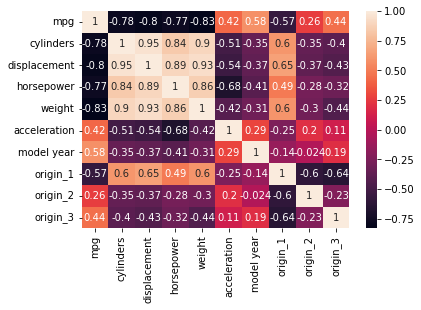

In [127]:
# creating a plot 
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
# Features highly corelated with mpg are 
# cylinders,displacement,horsepower, weight and origin_1

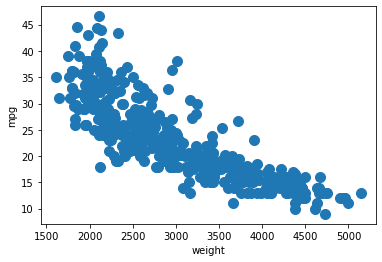

In [155]:
# Draw a scatter plot

df3.plot.scatter(x = 'weight',y = 'mpg', s = 100);

In [129]:
# The plot shows weight and mpg are highly related and 
#as weight increases the value of mpg decreases.

# This is aligned with teh correlation coefficient of -0.83, 
# which indicates strong inverse relation.

Randomly split the data into 80% training data and 20% test data

In [158]:
# Getting library

from sklearn.model_selection import train_test_split

# Assigning target as mpg
target = 'mpg'

# using all the other columns
features = ['cylinders','displacement','horsepower','weight',\
            'acceleration','model year','origin_1','origin_2','origin_3']

In [160]:
# Splitting to train and test 

X = df3[features]
Y = df3[target]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.80,)

Train an ordinary linear regression on the training data.

In [161]:
model = LinearRegression()

In [162]:
# Fitting linear regression on the train data 
model.fit(X_train, Y_train)

LinearRegression()

In [163]:
# Checking the model Coeffient result
pd.DataFrame(model.coef_, X.columns, columns = ['Coeff'])

,Coeff
cylinders,-0.587052
displacement,0.048282
horsepower,-0.024150
weight,-0.008573
acceleration,0.283490
model year,0.954918
origin_1,-2.070732
origin_2,2.109192
origin_3,-0.038460


Prediction and Model Evaluation 

In [164]:
# Getting liabrary
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [179]:
# Setting model prediction on the training  
predicted_y = model.predict(X_train)

In [181]:
# R2, RMSE and MAE on training data 
r2_train = model.score(X_train, Y_train)
rmse_train = sqrt(mean_squared_error(Y_train, predicted_y))
mae_train = mean_absolute_error(Y_train,predicted_y)
print ('Test R2: '+ str(r2_train))
print ('Test RMSE: '+ str(rmse_train))
print ('Test MAE: '+ str(mae_train))


Test R2: 0.8393163679470097
Test RMSE: 3.260765587087554
Test MAE: 2.616072251296223


In [184]:
# Setting model prediction on the test  
predicted_y_test = model.predict(X_test)

In [186]:
# R2, RMSE and MAE on training data 
r2_test = model.score(X_test, Y_test)
rmse_test = sqrt(mean_squared_error(Y_test, predicted_y_test))
mae_test = mean_absolute_error(Y_test, predicted_y_test)
print ('Test R2: '+ str(r2_test))
print ('Test RMSE: '+ str(rmse_test))
print ('Test MAE: '+ str(mae_test))


Test R2: 0.7895273730474798
Test RMSE: 3.529895738619546
Test MAE: 2.812467238037092


There is close alignment between the training and test, r2, mae and rmse. The training model fits 84% of the variance in the data. The average magnitue of error between the predicted value and actual value is 2.6

In [187]:
# Using Lasso Regression
from sklearn.linear_model import Lasso

model2 = Lasso()

# Fitting linear regression on the train data 
model2.fit(X_train, Y_train)


Lasso()

In [188]:
# Checking the model Coeffient result
pd.DataFrame(model2.coef_, X.columns, columns = ['Coeff'])

,Coeff
cylinders,-0.000000
displacement,0.004527
horsepower,-0.046983
weight,-0.005363
acceleration,0.000000
model year,0.774053
origin_1,-0.000000
origin_2,0.000000
origin_3,0.000000


In [189]:
# Setting model prediction on the training  
predicted_y_lasso = model2.predict(X_train)

In [194]:
# R2, RMSE and MAE on training data 
r2_train_lasso = model2.score(X_train, Y_train)
rmse_train_lasso = sqrt(mean_squared_error(Y_train,\
                                           predicted_y_lasso))
mae_train_lasso = mean_absolute_error(Y_train,predicted_y_lasso)
print ('r2_train_lasso: '+ str(r2_train_lasso))
print ('rmse_train_lasso: '+ str(rmse_train_lasso))
print ('mae_train_lasso: '+ str(mae_train_lasso))

r2_train_lasso: 0.8094205763394056
rmse_train_lasso: 3.551172457269966
mae_train_lasso: 2.7958049626843655


In [195]:
# Setting model prediction on the test  
predicted_y_test_lasso = model.predict(X_test)

In [196]:
# R2, RMSE and MAE on training data 
r2_test_lasso = model2.score(X_test, Y_test)
rmse_test_lasso = sqrt(mean_squared_error(Y_test,\
                                          predicted_y_test_lasso))
mae_test_lasso = mean_absolute_error(Y_test, predicted_y_test_lasso)
print ('r2_test_lasso: '+ str(r2_test))
print ('rmse_test_lasso: '+ str(rmse_test))
print ('mae_test_lasso: '+ str(mae_test))

r2_test_lasso: 0.7895273730474798
rmse_test_lasso: 3.529895738619546
mae_test_lasso: 2.812467238037092


Using Lasso regression model didn't result in a better model as the r2 has dropped and mae and rmse increased compared to the regression model.